
 TF-IDF Ranked Search Results
Score: 0.5527 | Deep Learning is a subset of Machine Learning.
Score: 0.4466 | Neural networks are the backbone of deep learning models.
Score: 0.3593 | Artificial Intelligence and Machine Learning are revolutionizing technology.
Score: 0.0000 | The cat sat on the mat and looked at the dog.
Score: 0.0000 | The dog chased the cat around the garden.
Score: 0.0000 | Dogs and cats are common household pets.
Score: 0.0000 | I love to play football on weekends.
Score: 0.0000 | My pet dog loves to play with a ball.

 BERT-Based Ranked Search Results
Score: 0.5322 | Neural networks are the backbone of deep learning models.
Score: 0.4485 | Deep Learning is a subset of Machine Learning.
Score: 0.4257 | Artificial Intelligence and Machine Learning are revolutionizing technology.
Score: 0.0141 | Dogs and cats are common household pets.
Score: 0.0040 | My pet dog loves to play with a ball.
Score: -0.0244 | The cat sat on the mat and looked at the dog.
Score: -0.0559 |

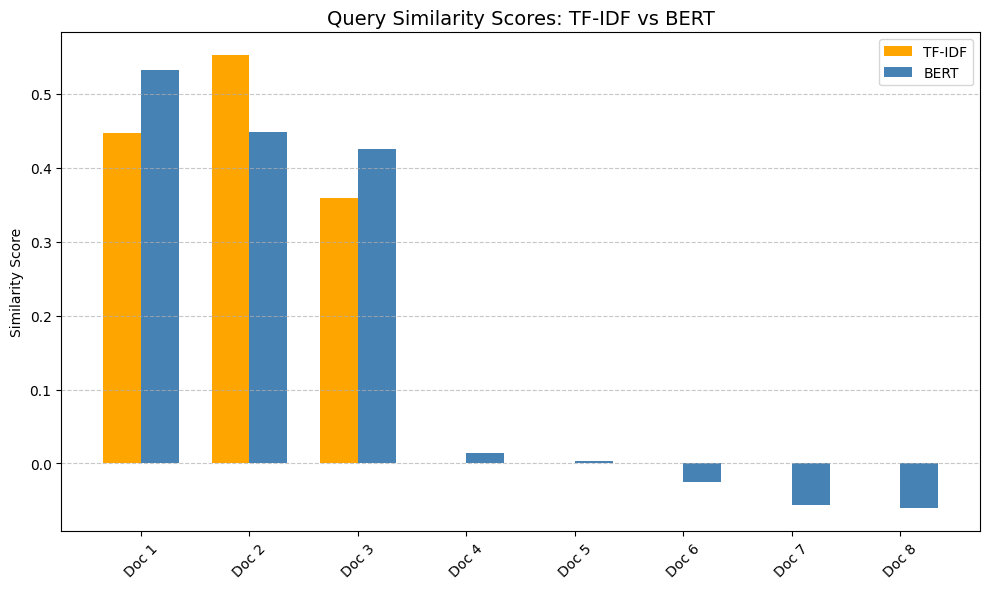

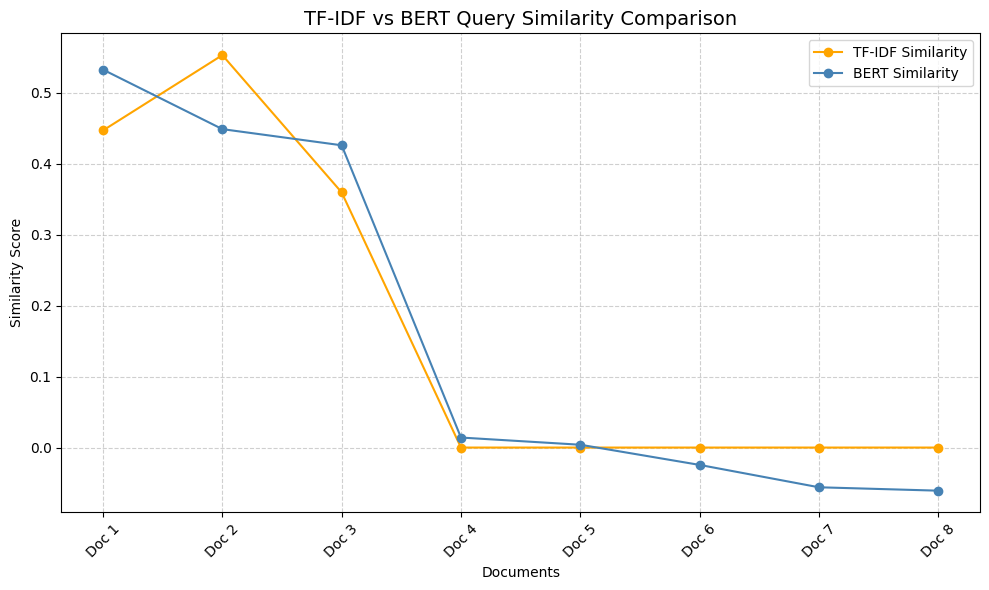

In [ ]:
# ==============================================================
# Semantic Search using BERT Embeddings vs TF-IDF
# CSE466 - Information Retrieval Project
# ==============================================================

!pip install sentence-transformers scikit-learn matplotlib pandas -q

# --------------------------------------------------------------
# 1️. Import Required Libraries
# --------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import seaborn as sns
from sklearn.decomposition import PCA

# --------------------------------------------------------------
# 2️. Sample Corpus
# --------------------------------------------------------------
documents = [
    "The cat sat on the mat and looked at the dog.",
    "Dogs and cats are common household pets.",
    "Artificial Intelligence and Machine Learning are revolutionizing technology.",
    "The dog chased the cat around the garden.",
    "Deep Learning is a subset of Machine Learning.",
    "I love to play football on weekends.",
    "Neural networks are the backbone of deep learning models.",
    "My pet dog loves to play with a ball."
]

# Example query
query = "machine learning models"

# --------------------------------------------------------------
# 3️. TF-IDF Based Retrieval
# --------------------------------------------------------------
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

query_tfidf = tfidf_vectorizer.transform([query])
tfidf_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

# Rank results
tfidf_ranked_indices = np.argsort(-tfidf_similarities)
print("\n==============================")
print(" TF-IDF Ranked Search Results")
print("==============================")
for idx in tfidf_ranked_indices:
    print(f"Score: {tfidf_similarities[idx]:.4f} | {documents[idx]}")

# --------------------------------------------------------------
# 4️. BERT Embedding Based Retrieval
# --------------------------------------------------------------
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight and fast model

doc_embeddings = model.encode(documents, convert_to_tensor=False)
query_embedding = model.encode([query], convert_to_tensor=False)

bert_similarities = cosine_similarity(query_embedding, doc_embeddings).flatten()
bert_ranked_indices = np.argsort(-bert_similarities)

print("\n==============================")
print(" BERT-Based Ranked Search Results")
print("==============================")
for idx in bert_ranked_indices:
    print(f"Score: {bert_similarities[idx]:.4f} | {documents[idx]}")

# --------------------------------------------------------------
# 5️. Comparison Table
# --------------------------------------------------------------
comparison_df = pd.DataFrame({
    'Document': documents,
    'TF-IDF Score': tfidf_similarities,
    'BERT Score': bert_similarities
})

print("\n==============================")
print(" TF-IDF vs BERT Similarity Comparison")
print("==============================")
print(comparison_df.sort_values(by='BERT Score', ascending=False))


# --------------------------------------------------------------
#  Visualization 1 - Query Similarity Comparison Bar Graph
# --------------------------------------------------------------

# Sort by BERT similarity for better readability
comparison_sorted = comparison_df.sort_values(by="BERT Score", ascending=False)

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(comparison_sorted))

plt.bar(x - bar_width/2, comparison_sorted["TF-IDF Score"], width=bar_width, label="TF-IDF", color="orange")
plt.bar(x + bar_width/2, comparison_sorted["BERT Score"], width=bar_width, label="BERT", color="steelblue")

plt.xticks(x, [f"Doc {i+1}" for i in range(len(x))], rotation=45)
plt.ylabel("Similarity Score")
plt.title("Query Similarity Scores: TF-IDF vs BERT", fontsize=14)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
#  Visualization 2 - TF-IDF vs BERT Line Plot Comparison
# --------------------------------------------------------------

# Sort the documents for consistent comparison
comparison_sorted = comparison_df.sort_values(by="BERT Score", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(comparison_sorted.index, comparison_sorted["TF-IDF Score"], marker='o', color='orange', label='TF-IDF Similarity')
plt.plot(comparison_sorted.index, comparison_sorted["BERT Score"], marker='o', color='steelblue', label='BERT Similarity')

plt.xticks(comparison_sorted.index, [f"Doc {i+1}" for i in range(len(comparison_sorted))], rotation=45)
plt.xlabel("Documents")
plt.ylabel("Similarity Score")
plt.title("TF-IDF vs BERT Query Similarity Comparison", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

